<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/fb_Entrainement_checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 1 : API + Pandas + Folium (1h30)

**Contexte :**
Vous travaillez pour une startup qui veut analyser les musées parisiens. Un dataset partiel est disponible, mais il manque les coordonnées géographiques.

In [39]:
import pandas as pd
museums = pd.read_csv("https://raw.githubusercontent.com/SeaJayEm/docs_formation/refs/heads/main/musees.csv", sep=";")
museums

,nom,adresse,arrondissement
0,Musée du Louvre,Rue de Rivoli,75001
1,Musée de l'Orangerie,Jardin des Tuileries,75001
2,Musée des Arts Décoratifs,107 Rue de Rivoli,75001
3,Musée des Arts et Métiers,60 Rue Réaumur,75003
4,Musée Carnavalet,23 Rue de Sévigné,75003
5,Musée Picasso,5 Rue de Thorigny,75003
6,Musée Cognacq-Jay,8 Rue Elzévir,75003
7,Maison de Victor Hugo,6 Place des Vosges,75004
8,Centre Pompidou,Place Georges-Pompidou,75004
9,Musée de Cluny,28 Rue du Sommerard,75005


**Récupération des coordonnées :**

- Utilisez l'API Nominatim (OpenStreetMap) pour obtenir les coordonnées (lat, lon) de chaque musée à partir de son adresse.

https://nominatim.org/release-docs/develop/api/Overview/

- Ajoutez deux colonnes latitude et longitude au DataFrame museums.

In [40]:
import pandas as pd
import requests
import folium

## Test sur Le Louvre

In [41]:
link = 'https://nominatim.openstreetmap.org/search?'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0',
    'Referer': 'https://www.example.com'
}

params = {'q' : "musee du Louvre",
          'format' : 'json'}

response = requests.get(link, params= params, headers = headers)

r = response.json()
r

[{'place_id': 93436608,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 7515426,
  'lat': '48.8611473',
  'lon': '2.3380277',
  'class': 'tourism',
  'type': 'museum',
  'place_rank': 30,
  'importance': 0.7007075748892404,
  'addresstype': 'tourism',
  'name': 'Musée du Louvre',
  'display_name': 'Musée du Louvre, Place du Carrousel, Paris 1er Arrondissement, Paris, Île-de-France, France métropolitaine, 75001, France',
  'boundingbox': ['48.8593816', '48.8629132', '2.3317162', '2.3400113']},
 {'place_id': 89242951,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 679476624,
  'lat': '48.8624127',
  'lon': '2.3365898',
  'class': 'railway',
  'type': 'subway_entrance',
  'place_rank': 30,
  'importance': 0.47544946407940364,
  'addresstype': 'railway',
  'name': 'Musée du Louvre (Musée du Louvre)',
  'display_name': 'Musée du Louvre (Musée d

In [42]:
dico_louvre = r[0]
dico_louvre

{'place_id': 93436608,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 7515426,
 'lat': '48.8611473',
 'lon': '2.3380277',
 'class': 'tourism',
 'type': 'museum',
 'place_rank': 30,
 'importance': 0.7007075748892404,
 'addresstype': 'tourism',
 'name': 'Musée du Louvre',
 'display_name': 'Musée du Louvre, Place du Carrousel, Paris 1er Arrondissement, Paris, Île-de-France, France métropolitaine, 75001, France',
 'boundingbox': ['48.8593816', '48.8629132', '2.3317162', '2.3400113']}

In [43]:
lat = dico_louvre['lat']
lat

'48.8611473'

In [44]:
def lat_lon(musee):
  link = 'https://nominatim.openstreetmap.org/search?'
  headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0',
      'Referer': 'https://www.example.com'
  }

  params = {'q' : f"{musee}+paris",
            'format' : 'json'}

  response = requests.get(link, params= params, headers = headers)

  r = response.json()
  return (r[0]['lat'], r[0]['lon'])

In [45]:
lat_lon("Centre Pompidou")

('48.8604964', '2.3524218')

In [48]:
museums['coordonnees'] = museums['nom'].apply(lat_lon)
museums

,nom,adresse,arrondissement,coordonnees
0,Musée du Louvre,Rue de Rivoli,75001,"(48.8611473, 2.3380277)"
1,Musée de l'Orangerie,Jardin des Tuileries,75001,"(48.8637655, 2.3226602)"
2,Musée des Arts Décoratifs,107 Rue de Rivoli,75001,"(48.8631692, 2.3329513)"
3,Musée des Arts et Métiers,60 Rue Réaumur,75003,"(48.8660977, 2.3554138)"
4,Musée Carnavalet,23 Rue de Sévigné,75003,"(48.8573232, 2.3624734)"
5,Musée Picasso,5 Rue de Thorigny,75003,"(48.8598698, 2.3621152)"
6,Musée Cognacq-Jay,8 Rue Elzévir,75003,"(48.8581209, 2.3616824)"
7,Maison de Victor Hugo,6 Place des Vosges,75004,"(48.8547990, 2.3661358)"
8,Centre Pompidou,Place Georges-Pompidou,75004,"(48.8604964, 2.3524218)"
9,Musée de Cluny,28 Rue du Sommerard,75005,"(48.8506495, 2.3435643)"


In [49]:
museums['coordonnees'][0][1]

'2.3380277'

In [50]:
museums['latitude'] = museums['coordonnees'].apply(lambda x : x[0])
museums['longitude'] = museums['coordonnees'].apply(lambda x : x[1])
museums

,nom,adresse,arrondissement,coordonnees,latitude,longitude
0,Musée du Louvre,Rue de Rivoli,75001,"(48.8611473, 2.3380277)",48.8611473,2.3380277
1,Musée de l'Orangerie,Jardin des Tuileries,75001,"(48.8637655, 2.3226602)",48.8637655,2.3226602
2,Musée des Arts Décoratifs,107 Rue de Rivoli,75001,"(48.8631692, 2.3329513)",48.8631692,2.3329513
3,Musée des Arts et Métiers,60 Rue Réaumur,75003,"(48.8660977, 2.3554138)",48.8660977,2.3554138
4,Musée Carnavalet,23 Rue de Sévigné,75003,"(48.8573232, 2.3624734)",48.8573232,2.3624734
5,Musée Picasso,5 Rue de Thorigny,75003,"(48.8598698, 2.3621152)",48.8598698,2.3621152
6,Musée Cognacq-Jay,8 Rue Elzévir,75003,"(48.8581209, 2.3616824)",48.8581209,2.3616824
7,Maison de Victor Hugo,6 Place des Vosges,75004,"(48.8547990, 2.3661358)",48.8547990,2.3661358
8,Centre Pompidou,Place Georges-Pompidou,75004,"(48.8604964, 2.3524218)",48.8604964,2.3524218
9,Musée de Cluny,28 Rue du Sommerard,75005,"(48.8506495, 2.3435643)",48.8506495,2.3435643


**Visualisation avec Folium :**

- Créez une carte centrée sur Paris avec folium.
- Ajoutez des marqueurs pour chaque musée avec un popup affichant son nom.
- Bonus : Utilisez des icônes personnalisées.

In [61]:
m = folium
point = [float(museums['latitude'][14]), float(museums['longitude'][14])]

m = folium.Map(location=point,zoom_start=13)

point

[48.8599179, 2.3265849]

In [65]:
for id in range(museums.shape[0]) :
  folium.Marker( location = museums.loc[id, 'coordonnees'],
                popup = folium.Popup(f"{museums.loc[id, 'nom']}")).add_to(m)
m

**Analyse par arrondissement :**

- Comptez le nombre de musées par arrondissement et affichez un graphique en barres (avec matplotlib ou seaborn).
- Quel arrondissement a le plus de musées ?

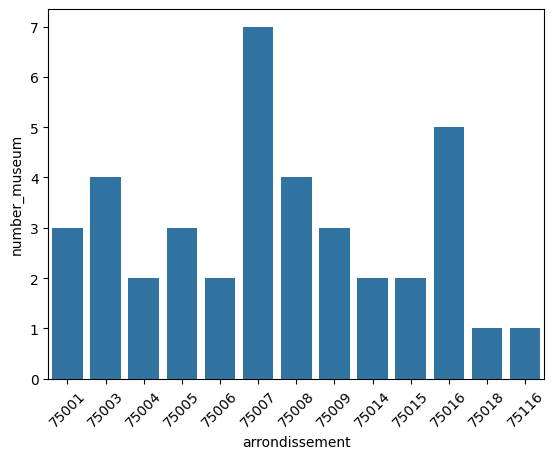

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
arrondissement_museum = museums.groupby('arrondissement').size().reset_index().rename(columns= {0 : 'number_museum'}).sort_values('number_museum', ascending= False)
arrondissement_museum

sns.barplot(arrondissement_museum, x= 'arrondissement', y = 'number_museum', order=)
plt.xticks(rotation = 45)
plt.show()

# Partie 2 – Exploration & DataViz (≈ 1h)

**Dataset : amazon_reviews.csv**

https://raw.githubusercontent.com/SeaJayEm/docs_formation/refs/heads/main/amazon_reviews.csv


Colonnes principales :

reviewText → texte

overall → note (1 à 5)

reviewTime → date

helpful_yes, helpful_no, total_vote

score_pos_neg_diff, score_average_rating, wilson_lower_bound

## PARTIE 1 — Chargement & exploration (15 min)

- Charger le CSV dans un DataFrame df

- Afficher les 5 premières lignes

- Afficher les infos générales (info, shape)

- Vérifier les valeurs manquantes

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/SeaJayEm/docs_formation/refs/heads/main/amazon_reviews.csv')
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [94]:
print(f"Nombre de valeurs nulles : {df.isna().sum()}")

Nombre de valeurs nulles : Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


## PARTIE 2 — Nettoyage & préparation (45 min)

- Supprimer les lignes avec des NaN

- Convertir reviewTime en type datetime

- Ajouter une colonne "sentiment" contenant "good" si "overall" est égal à 4 ou 5, et "bad" sinon  

In [95]:
df_nettoyage = df.copy()
df_nettoyage = df_nettoyage.dropna()
df_nettoyage['reviewTime'] = pd.to_datetime(df_nettoyage['reviewTime'])

df_nettoyage['sentiment'] = df['overall'].apply(lambda x: 'good' if x>= 4 else 'bad' )

df_nettoyage.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,good
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,good
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,good
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,good
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,good


- Ne conservez que les colonnes reviewText, overall, reviewTime, helpful_yes, helpful_no, total_vote, et sentiment

- Décrivez et affichez des graphiques pour représenter la distribution de la colonne overall, helpful_yes, helpful_no, et total_vote. N'oubliez pas de commenter.

- Afficher un diagramme de dispersion pour comparer la colonne helpful_yes et la colonne overall et calculez la corrélation. Y-a-t-il une corrélation ?

In [96]:
columns = ['reviewText', 'overall', 'reviewTime', 'helpful_yes', 'helpful_no', 'total_vote','sentiment']
df_nettoyage = df_nettoyage[columns]

df_nettoyage.sample(5)

,reviewText,overall,reviewTime,helpful_yes,helpful_no,total_vote,sentiment
322,So far so good. I've never noticed a differenc...,5.0,2013-02-11,0,0,0,good
2026,good buy on this card. was just what I needed ...,5.0,2014-09-04,0,0,0,good
1179,This is a quality 64gb micro sd memory card. I...,5.0,2013-04-23,0,0,0,good
1894,Great transfer speeds for my Tablet. Going on ...,5.0,2013-12-14,0,0,0,good
3396,As advertised this guy holds some serious stuf...,5.0,2012-11-24,0,0,0,good


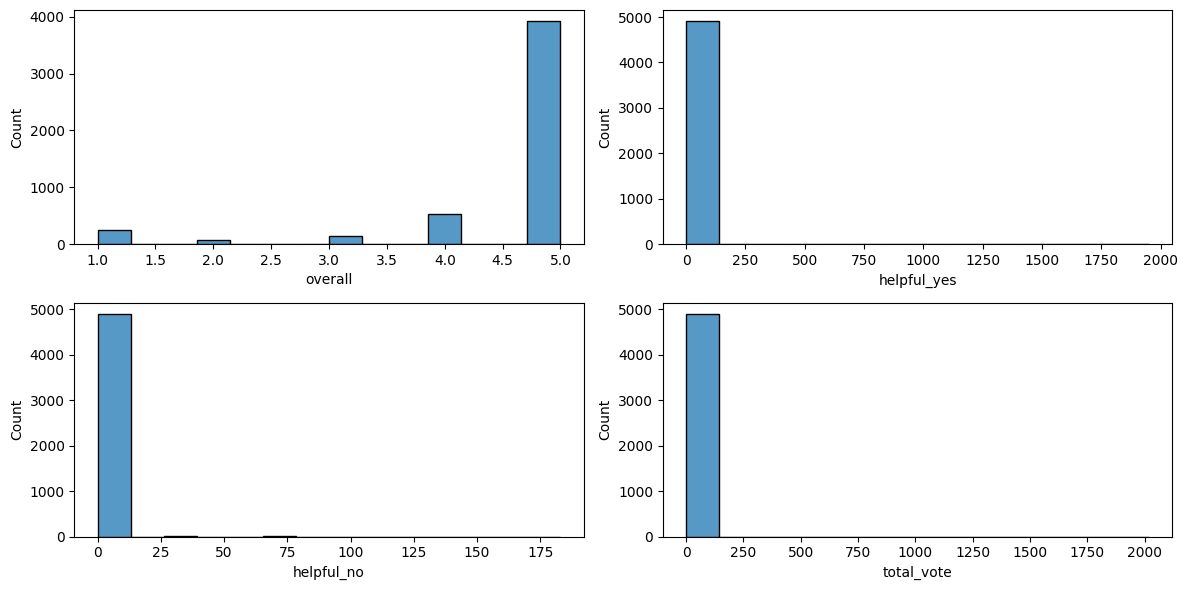

In [113]:
list_graph = ['overall', 'helpful_yes', 'helpful_no','total_vote']

fig, axes = plt.subplots(2,2, figsize = (12, 6))

for i,col in enumerate(list_graph) :
  sns.histplot(df_nettoyage[col], ax= axes[i//2, i%2])

plt.tight_layout()


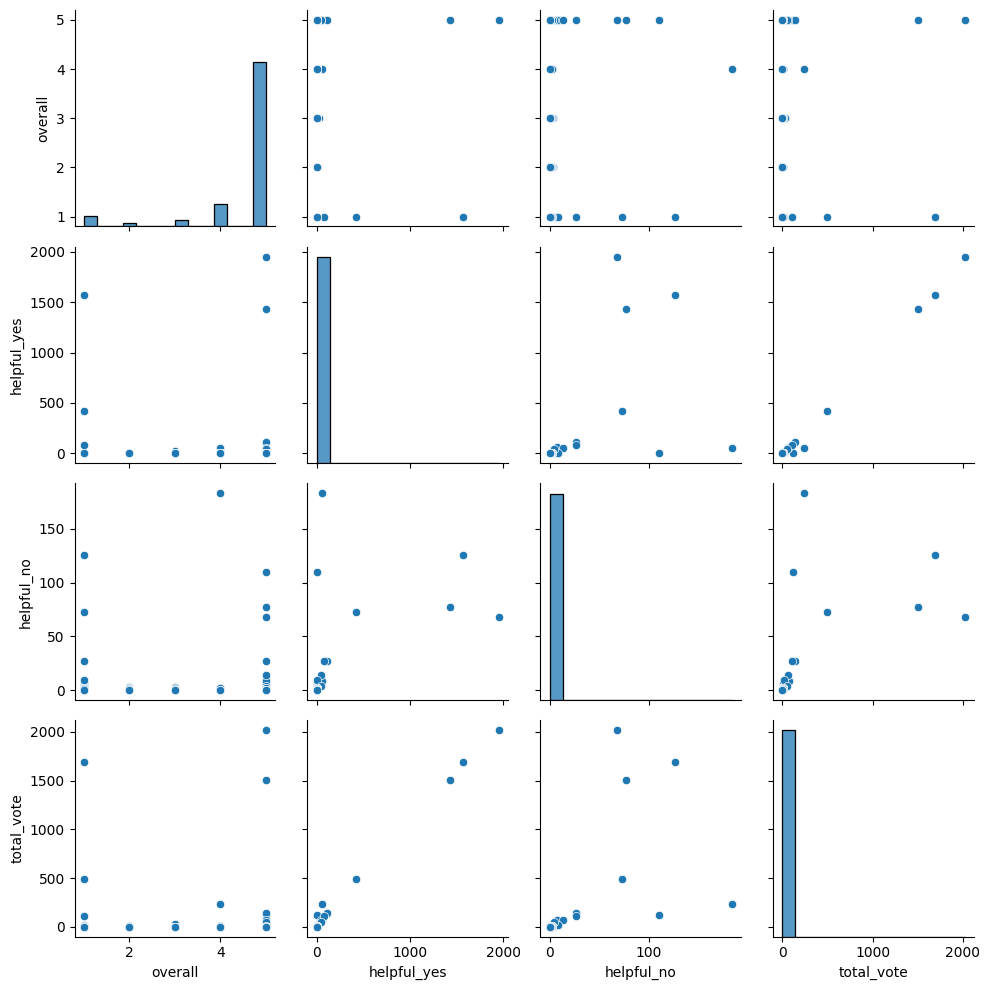

In [116]:
list_graph = ['overall', 'helpful_yes', 'helpful_no','total_vote']

sns.pairplot(df_nettoyage)

plt.tight_layout()


## Partie 3 – NLP & classification (≈ 1h30)

### Objectif : prédire `sentiment` à partir de `reviewText`.

**Énoncé**

- Nettoyer le texte (minuscule, ponctuation, stopwords)

- Préparer X = `reviewText` (nettoyé), y = `sentiment`

- Split 80/20 + random_state

- TF-IDF

- Modèle : LogisticRegression

- Évaluer (train/test, matrice de confusion, rapport)

- Interpéter en détail

- Améliorer sans changer d’algo : par exemple, essayer bigrammes et/ou class_weight="balanced" et comparer

In [146]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [117]:
!pip install nltk

In [121]:
import nltk
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [122]:
nlp = spacy.load('en_core_web_sm')
stopwordsenglish = nltk.corpus.stopwords.words("english")

In [130]:
def clean(text) :
  # Spacy découpe automatiquement en tokens avec cette syntaxe :
  sent_tokens = nlp(text)
  # Create list
  words_lemma = [
      token.lemma_.lower()
      for token in sent_tokens
      if not token.is_punct
      and not token.is_space
      and token.lemma_.lower() not in stopwordsenglish
]

  return " ".join(words_lemma)



In [132]:
df_nettoyage["reviewText"] = df_nettoyage["reviewText"].apply(clean)
df_nettoyage.head(5)

,reviewText,overall,reviewTime,helpful_yes,helpful_no,total_vote,sentiment
1,purchase device work advertise never much phon...,5.0,2013-10-25,0,0,0,good
2,work expect spring high capacity think make bi...,4.0,2012-12-23,0,0,0,good
3,think work great diff bran 64 gb card go south...,5.0,2013-11-21,0,0,0,good
4,buy retail packaging arrive legit orange envel...,5.0,2013-07-13,0,0,0,good
5,mini storage anything else suppose purchase ad...,5.0,2013-04-29,0,0,0,good


In [135]:
X = df_nettoyage['reviewText']
y = df_nettoyage['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, stratify = y)


In [157]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [144]:
pipeline_log = Pipeline(steps = [
    ('preprocessor' , TfidfVectorizer()),
    ('classifier' , LogisticRegression())
])

In [145]:
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [147]:
y_test_pred = pipeline_log.predict(X_test)
y_train_pred =  pipeline_log.predict(X_train)

In [154]:
print(f"Classification report test \n\n"
      f"{classification_report(y_test, y_test_pred)}")

Classification report test 

              precision    recall  f1-score   support

         bad       0.89      0.26      0.41       117
        good       0.93      1.00      0.96      1112

    accuracy                           0.93      1229
   macro avg       0.91      0.63      0.68      1229
weighted avg       0.92      0.93      0.91      1229



In [155]:
print(f"Classification report train \n\n"
      f"{classification_report(y_train, y_train_pred)}")

Classification report train 

              precision    recall  f1-score   support

         bad       0.96      0.30      0.46       349
        good       0.93      1.00      0.96      3335

    accuracy                           0.93      3684
   macro avg       0.95      0.65      0.71      3684
weighted avg       0.93      0.93      0.92      3684



comme il y'a très peu d'avis negatif la précision est très bonnes (s'il mettait good a tout le monde il a 90% de chance d'avoir bon)
Les recall montrent plein de faux negatif.
Par fainéantise, le modele prefere dire good

In [156]:
pipeline2_log = Pipeline(steps = [
    ('preprocessor' , TfidfVectorizer()),
    ('classifier' , LogisticRegression())
])

param_grid = {
    "classifier__class_weight" : ['balanced', None],
    "preprocessor__ngram_range" : [(1, 1), (1, 2), (1,3)],
    "preprocessor__min_df" : [2, 5]
}

In [160]:
grid = GridSearchCV(
    pipeline2_log,
    param_grid,
    scoring='f1_macro',
    cv=5,
    verbose=2
)

In [161]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 1); total time=   0.2s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 1); total time=   0.3s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 1); total time=   0.3s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 1); total time=   0.3s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 1); total time=   0.4s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 2); total time=   0.8s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_range=(1, 2); total time=   0.9s
[CV] END classifier__class_weight=balanced, preprocessor__min_df=2, preprocessor__ngram_rang

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', TfidfVectorizer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'preprocessor__min_df': [2, 5],
                         'preprocessor__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='f1_macro', verbose=2)

In [163]:
print(f"Meilleurs paramètres : {grid.best_params_}")
print(f"Meilleur score : {grid.best_score_:.4f}")

Meilleurs paramètres : {'classifier__class_weight': 'balanced', 'preprocessor__min_df': 2, 'preprocessor__ngram_range': (1, 2)}
Meilleur score : 0.8188


In [165]:
best_model = grid.best_estimator_

In [166]:
y_test2_pred = best_model.predict(X_test)
y_train2_pred =  best_model.predict(X_train)

In [167]:
print(f"Classification report test \n\n"
      f"{classification_report(y_test, y_test2_pred)}")

Classification report test 

              precision    recall  f1-score   support

         bad       0.57      0.70      0.63       117
        good       0.97      0.95      0.96      1112

    accuracy                           0.92      1229
   macro avg       0.77      0.82      0.79      1229
weighted avg       0.93      0.92      0.93      1229



In [169]:
print(f"Classification report train \n\n"
      f"{classification_report(y_train, y_train2_pred)}")

Classification report train 

              precision    recall  f1-score   support

         bad       0.77      0.99      0.87       349
        good       1.00      0.97      0.98      3335

    accuracy                           0.97      3684
   macro avg       0.88      0.98      0.92      3684
weighted avg       0.98      0.97      0.97      3684

